In [5]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=1000, n_features=10, random_state=42)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [3, 5, 7, 9],
              'weights': ['uniform', 'distance']}

knn = KNeighborsRegressor()

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best negative mean squared error:", grid_search.best_score_)

Best parameters: {'n_neighbors': 5, 'weights': 'distance'}
Best negative mean squared error: -4013.6555379143383


In [8]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

best_knn = KNeighborsRegressor(**grid_search.best_params_)
best_knn.fit(X_train, y_train)
y_pred = best_knn.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 3826.707717096735
Root Mean Squared Error: 61.860388918085015
Mean Absolute Error: 49.18826785322699
R-squared: 0.7586030063086415


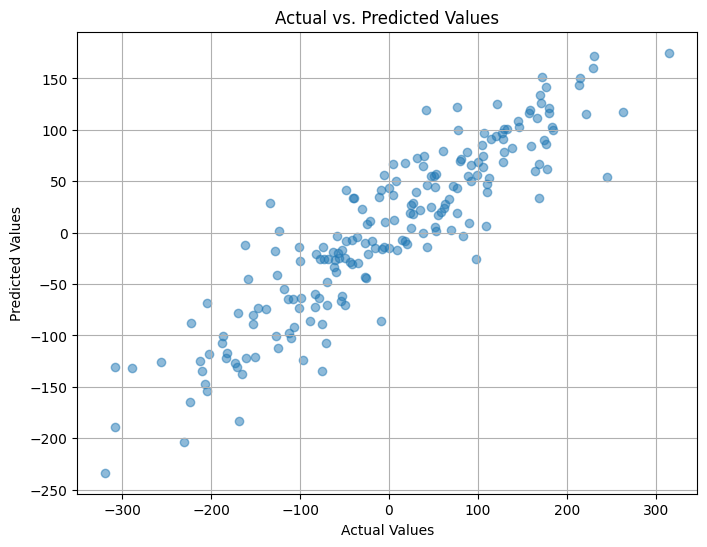

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.grid(True)
plt.show()